In [1]:
import tensorflow as tf

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
a= tf.Variable(1, name="a")
b=tf.Variable(2,name="b")
f=a+b
init=tf.global_variables_initializer() 
with tf.Session() as st:
    init.run()
    print(f.eval())

3


In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
ses=tf.InteractiveSession()
mnist=input_data.read_data_sets('MNIST_data/',one_hot=True)
#one hot means if I have the binary encoded value with 10 values .

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


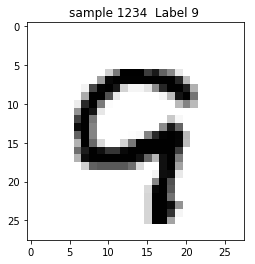

In [38]:
import matplotlib.pyplot as plt

def display_sample(num):
    print(mnist.train.labels[num])
    #converting to the number 
    label=mnist.train.labels[num].argmax(axis=0)
    #chaging it to the image to see in the metrics form
    image=mnist.train.images[num].reshape([28,28])
    plt.title('sample %d  Label %d '% (num,label))
    plt.imshow(image,cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1234)

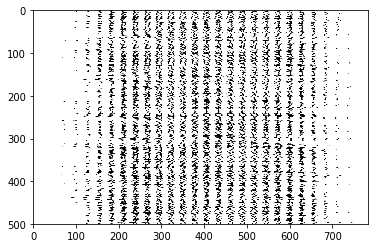

In [16]:
import numpy as np
images = mnist.train.images[0].reshape([1,784])
for i in range(1,500):
    images = np.concatenate((images,mnist.train.images[i].reshape([1,784])))
plt.imshow(images,cmap=plt.get_cmap('gray_r'))
plt.show()

In [60]:
input_images =tf.placeholder(tf.float32,shape=[None,784])
target_labels= tf.placeholder(tf.float32,shape = [None,10])

In [61]:
#here we start creating the nueral netwok which do have the hidden layers in it.
hidden_nodes =512
input_weights=tf.Variable(tf.truncated_normal([784,hidden_nodes]))
input_biases= tf.Variable(tf.zeros([hidden_nodes]))

hidden_weights=tf.Variable(tf.truncated_normal([hidden_nodes,10]))
hidden_biases = tf.Variable(tf.zeros([10]))


In [62]:
#now defining the connections 
input_layer = tf.matmul(input_images, input_weights)
#give the hidder layer nn.relu()
hidden_layer = tf.nn.relu(input_layer+input_biases)
digit_weights=tf.matmul(hidden_layer,hidden_weights)+hidden_biases

In [63]:
#loss function means correctness of the systems 
#this actually measure using the softmax
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=digit_weights, labels = target_labels))

In [64]:
#here we will define the optimizer which is used by the neural network so that it can give the optimal solution for
#the classification 
# .5 is learning rate 

optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss_function)

In [65]:
# create the function which will measures the accuracy of the systems 
correct_predication = tf.equal(tf.argmax(digit_weights,1),tf.argmax(target_labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_predication,tf.float32))

In [66]:
#initialiing the global values for the tensorflow 
tf.global_variables_initializer().run()

for x in range(2000):
    batch = mnist.train.next_batch(100)
    optimizer.run(feed_dict={input_images: batch[0], target_labels: batch[1]})
    if((x+1)%100==0):
        print("accuracy is ",str(accuracy.eval(feed_dict={input_images: mnist.test.images, target_labels: mnist.test.labels})))
    

accuracy is  0.8602
accuracy is  0.8716
accuracy is  0.8907
accuracy is  0.8962
accuracy is  0.9022
accuracy is  0.9042
accuracy is  0.9104
accuracy is  0.9116
accuracy is  0.9136
accuracy is  0.9139
accuracy is  0.9177
accuracy is  0.923
accuracy is  0.9246
accuracy is  0.9225
accuracy is  0.9248
accuracy is  0.9287
accuracy is  0.9295
accuracy is  0.929
accuracy is  0.9268
accuracy is  0.9308


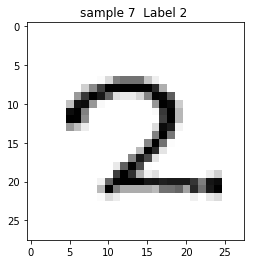

In [69]:
for x in range(100):
    x_train = mnist.test.images[x,:].reshape(1,784)
    y_train = mnist.test.labels[x,:]
    #convert it to the one hot label
    label = y_train.argmax()
    #get the classification from the neural network and convert it ot hte integer so that we can compare
    prediction = ses.run(digit_weights,feed_dict ={input_images: x_train}).argmax()
    
    if(prediction!= label):
        plt.title('sample %d  Label %d '% (prediction,label))
        plt.imshow(x_train.reshape([28,28]),cmap=plt.get_cmap('gray_r'))
        plt.show()

In [70]:
#CNN using Keras 


In [72]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D,MaxPooling2D, Flatten
from keras.optimizers import RMSprop

In [73]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step
